## Load df

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

#TODO: argument for dataset folder name
dataset_dir = os.path.join(features_dir, "music_audio_benchmark")

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [3]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key', 'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name',
    'path', 'path_spectogram_img', 'path_spectogram_arr', 
    'path_mel_spectogram_img', 'path_mel_spectogram_arr', 'path_chromagram_img',
    'path_chromagram_arr', 'path_mfccs_arr', 'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


=== FEATURES ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,alternative


=== PATHS ===


,name,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


In [4]:
path_arr_columns = [
    'path_spectogram_arr',
    'path_mel_spectogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr'
]


def load_numpy_array(path):
    return np.load(path)


def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)


def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=0)


def calculate_mean_across_row(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

In [5]:
# for column in path_arr_columns:
#     path = df_paths[column][0]
#     n_arr = load_numpy_array(path)
#     print(n_arr.shape)
    
#     mean_n_arr = calculate_mean_across_column(path)
#     print(mean_n_arr.shape)
    
#     if column == 'path_spectogram_arr':
#         print(mean_n_arr)

In [6]:
def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
#     means_series = df_paths[column_name].apply(calculate_mean_across_row) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [7]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df('path_mel_spectogram_arr')

# TODO: fill with 0?
long_mean_df.fillna(0, inplace=True)
long_mean_df.head()

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_857,path_mel_spectogram_arr_858,path_mel_spectogram_arr_859,path_mel_spectogram_arr_860,path_mel_spectogram_arr_861,path_mel_spectogram_arr_862,path_mel_spectogram_arr_863,path_mel_spectogram_arr_864,path_mel_spectogram_arr_865,path_mel_spectogram_arr_866
0,-80.0,-79.448700,-77.027161,-76.309349,-76.189308,-76.281441,-76.517120,-76.398163,-76.473480,-76.588013,...,-72.901230,-72.481842,-71.687721,-71.350029,-71.382553,-71.743591,-72.356377,-75.916733,-80.000000,-80.0
1,-80.0,-76.604889,-68.825005,-66.730057,-66.598244,-65.200081,-63.867188,-63.950096,-64.487869,-64.992653,...,-70.697556,-70.152374,-70.002045,-70.502800,-70.328400,-70.201859,-70.489288,-73.573784,-79.936684,-80.0
2,-80.0,-79.286804,-74.748322,-73.585594,-73.217728,-72.910393,-73.274109,-73.209167,-73.012413,-73.248878,...,-71.450882,-71.363876,-71.079796,-71.223488,-71.291016,-71.303177,-71.458252,-75.035858,-80.000000,-80.0
3,-80.0,-79.892334,-77.114410,-75.767441,-76.148239,-76.467773,-76.307877,-76.363441,-76.363800,-76.416794,...,-67.044189,-67.398819,-68.380341,-68.918701,-70.084648,-70.564835,-70.835449,-74.387238,-79.994041,-80.0
4,-80.0,-80.000000,-79.861252,-79.513779,-79.485336,-79.532516,-79.544159,-79.501740,-79.528870,-79.593468,...,-77.125870,-77.084328,-77.166641,-77.326683,-77.308563,-77.259430,-76.404190,-77.698563,-80.000000,-80.0


In [8]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [9]:
# show_df_summary(df)

## Prepare data for clustering

In [10]:
from sklearn.preprocessing import MinMaxScaler
import re

In [11]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_mean_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectogram', 'mean_mel_spectogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_arr_.*$') # path_*_arr_
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [12]:
df_to_cluster = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)
df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

df_to_cluster

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_857,path_mel_spectogram_arr_858,path_mel_spectogram_arr_859,path_mel_spectogram_arr_860,path_mel_spectogram_arr_861,path_mel_spectogram_arr_862,path_mel_spectogram_arr_863,path_mel_spectogram_arr_864,path_mel_spectogram_arr_865,path_mel_spectogram_arr_866
0,0.5,0.088257,0.149354,0.140427,0.137804,0.118394,0.122172,0.130087,0.127496,0.124444,...,0.265025,0.284090,0.279051,0.108125,0.107718,0.103205,0.095545,0.051041,9.536742e-08,9.536742e-08
1,0.5,0.543510,0.561426,0.504912,0.484640,0.471208,0.565903,0.579672,0.560819,0.547356,...,0.347297,0.372115,0.335641,0.118715,0.120895,0.122477,0.118884,0.080328,7.915496e-04,9.536742e-08
2,0.5,0.114174,0.263842,0.244064,0.245263,0.225723,0.235929,0.245263,0.252626,0.246231,...,0.319172,0.326335,0.299460,0.109706,0.108862,0.108710,0.106772,0.062052,9.536742e-08,9.536742e-08
3,0.5,0.017237,0.144970,0.161046,0.139289,0.112461,0.129511,0.131341,0.131462,0.130689,...,0.483691,0.476164,0.390083,0.138516,0.123942,0.117940,0.114557,0.070160,7.457732e-05,9.536742e-08
4,0.5,0.000001,0.006971,0.018500,0.018611,0.014884,0.015990,0.017996,0.017033,0.014827,...,0.107303,0.110175,0.095119,0.033416,0.033643,0.034257,0.044948,0.028768,9.536742e-08,9.536742e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0.5,0.574533,0.676836,0.602377,0.552671,0.498451,0.550282,0.610444,0.613347,0.571126,...,0.565277,0.572105,0.506264,0.193600,0.183441,0.180652,0.183737,0.108136,9.536742e-08,9.536742e-08
1882,0.5,0.084810,0.499564,0.474342,0.400283,0.348895,0.388619,0.383088,0.395983,0.417248,...,0.398350,0.393564,0.329955,0.128646,0.124119,0.126308,0.112456,0.055352,5.812644e-04,9.536742e-08
1883,0.5,0.159203,0.333047,0.351815,0.321105,0.282213,0.302429,0.316452,0.317616,0.313383,...,0.382262,0.363080,0.312292,0.120101,0.126804,0.133384,0.130800,0.069437,9.536742e-08,9.536742e-08
1884,0.5,0.317637,0.461997,0.437532,0.390007,0.354814,0.400054,0.447045,0.462446,0.454270,...,0.515136,0.492027,0.449082,0.168019,0.157565,0.149985,0.141347,0.072177,9.536742e-08,9.536742e-08


In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


In [14]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [15]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [16]:
# show_correlation_pairs(df_correlation)

## PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
def show_explained_variance(df):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

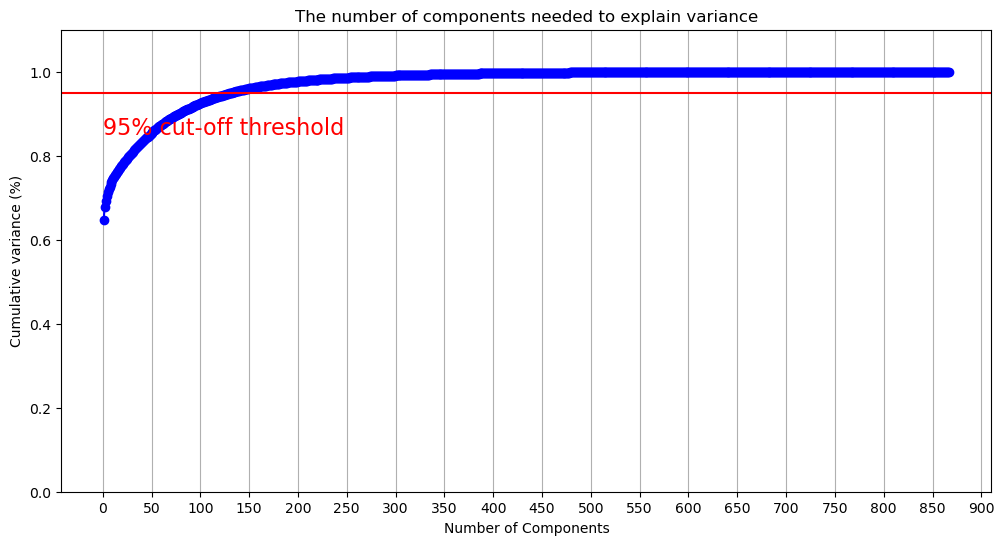

In [19]:
show_explained_variance(df_to_cluster)

In [20]:
def execute_pca(df, n_components=15):
    pca = PCA(n_components=n_components)
    pca.fit(df)

    explained_variance = pca.explained_variance_ratio_
    print("Sum of Explained Variance:", sum(explained_variance))
    
    pca_data = pca.transform(df)
    pca_columns = [f'PCA_{i + 1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
    return pca_df

In [21]:
pca_df = execute_pca(df_to_cluster, 15)
pca_df

Sum of Explained Variance: 0.761080756295572


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-3.941095,0.613798,0.068312,0.327172,0.203481,-0.227948,-0.243033,-0.169025,0.151856,-0.149805,-0.171271,0.120038,-0.009122,-0.004136,0.297556
1,-0.767656,-0.709013,-0.754096,1.138439,1.466333,-0.103980,-0.460405,-0.425370,-1.026007,0.275289,-0.112121,-0.063543,0.389802,-0.250758,0.058460
2,-0.842591,0.915448,0.727775,0.013304,-0.233998,0.189765,-0.223251,0.117688,0.100332,0.363528,0.330458,0.287092,-0.076048,-0.279277,-0.014597
3,-2.853829,1.805174,-0.715076,0.111980,-0.565513,0.417527,-0.096709,0.173867,0.770046,0.626933,0.377653,0.242837,0.608714,-0.101496,-0.019739
4,0.451896,0.390069,-1.102022,-1.195406,-0.819356,0.475560,-1.182428,-0.388091,0.225468,-0.641754,-0.210081,0.732085,0.530036,0.565679,0.386810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,7.893266,0.496652,0.349808,-0.010017,0.406980,0.373132,-0.389446,-0.109071,0.269452,-0.125169,0.024288,0.026483,-0.109668,-0.065803,0.061044
1882,0.595920,0.198727,0.372676,-0.578315,-0.351847,0.103794,0.081681,0.126634,-0.162659,0.140864,0.129803,0.387695,-0.309518,0.096494,0.540798
1883,0.644094,0.108236,0.510139,-0.158486,-0.274801,-0.633956,-0.003591,-0.170054,0.074922,-0.046335,-0.034155,0.215421,-0.004833,0.340196,0.054797
1884,5.497147,0.200922,-0.489111,0.315042,0.046831,-0.489797,0.026477,0.052419,-0.290389,0.005849,0.132407,0.261481,-0.275436,-0.170597,0.001868


## Get number of clusters

In [22]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV
from fcmeans import FCM

### Elbow method

In [23]:
def elbow_method(X, max_clusters, estimator, estimator_params={}):
    inertia = list()
    for i in range(2, max_clusters):
        clusterer = estimator(n_clusters = i, **estimator_params)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)

    plt.plot(range(2, max_clusters), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

### Silhouette analysis

In [24]:
def silhouette_analysis(X, max_clusters, estimator, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            clusterer.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        scores[n_clusters] = silhouette_avg
        
#         fig, ax1 = plt.subplots()
#         fig.set_size_inches(18, 7)

#         ax1.set_xlim([-0.1, 1])
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
#         sample_silhouette_values = silhouette_samples(X, cluster_labels)

#         y_lower = 10
#         for i in range(n_clusters):
#             ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#             ith_cluster_silhouette_values.sort()

#             size_cluster_i = ith_cluster_silhouette_values.shape[0]
#             y_upper = y_lower + size_cluster_i

#             color = cm.nipy_spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(
#                 np.arange(y_lower, y_upper),
#                 0,
#                 ith_cluster_silhouette_values,
#                 facecolor=color,
#                 edgecolor=color,
#                 alpha=0.7
#             )

#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#             y_lower = y_upper + 10


#         ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")

#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#         ax1.set_yticks([])
#         ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #     ax2.scatter(
    #         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #     )

    #     centers = clusterer.cluster_centers_
    #     ax2.scatter(
    #         centers[:, 0],
    #         centers[:, 1],
    #         marker="o",
    #         c="white",
    #         alpha=1,
    #         s=200,
    #         edgecolor="k",
    #     )

    #     for i, c in enumerate(centers):
    #         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #     ax2.set_title("The visualization of the clustered data.")
    #     ax2.set_xlabel("Feature space for the 1st feature")
    #     ax2.set_ylabel("Feature space for the 2nd feature")

    #     plt.suptitle(
    #         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #         % n_clusters,
    #         fontsize=14,
    #         fontweight="bold",
    #     )


#     plt.show()
#     return best_score_clusters, best_score
    return scores

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

## KMeans

=== BEFORE PCA ===


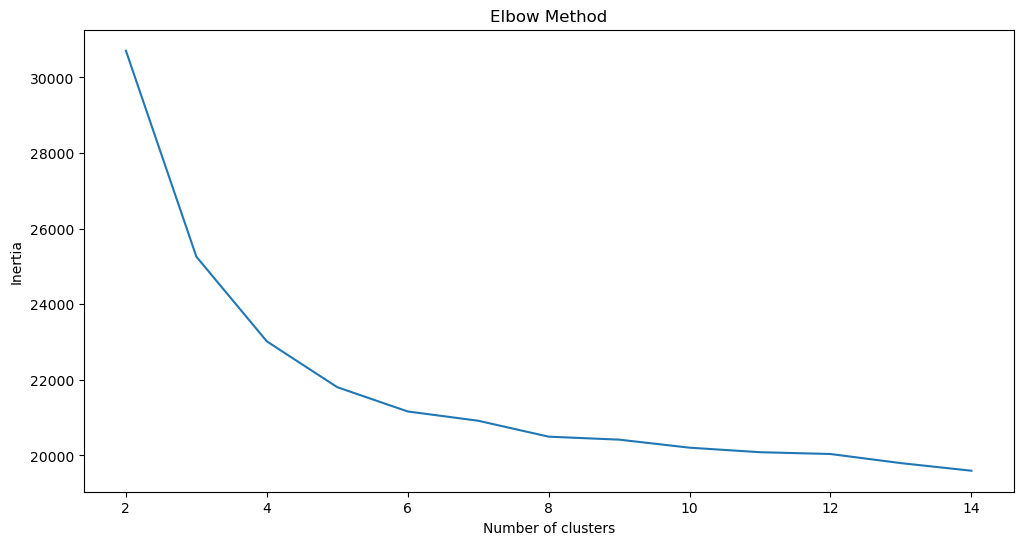

=== AFTER PCA ===


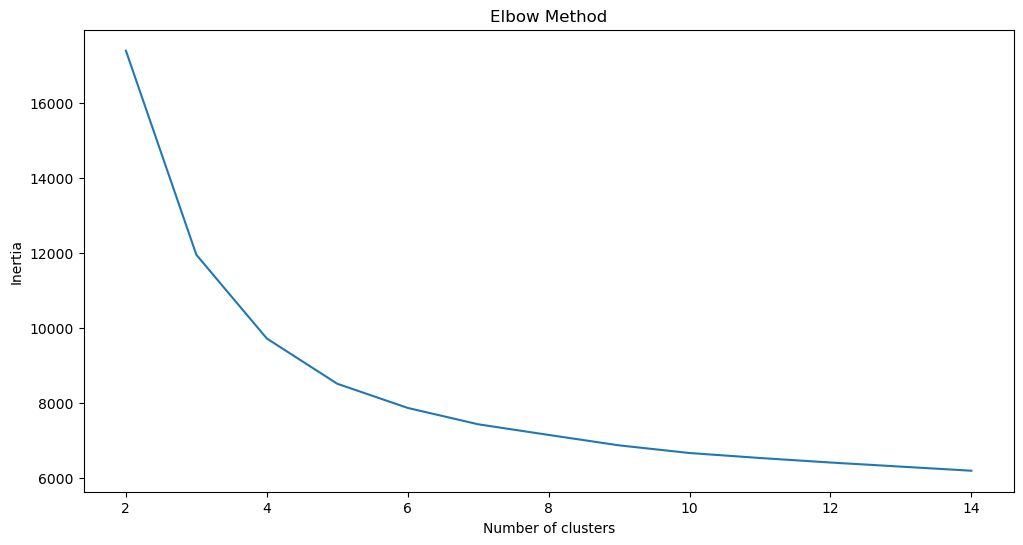

In [25]:
print("=== BEFORE PCA ===")
params = {
    'n_init': 'auto',
    'random_state': 23,
}
elbow_method(df_to_cluster, 15, KMeans, params)

print("=== AFTER PCA ===")
elbow_method(pca_df, 15, KMeans, params)

In [26]:
params = {
    'n_init': 'auto',
    'random_state': 23,
}
print("=== df_to_cluster ===")
scores = silhouette_analysis(df_to_cluster, 15, KMeans, params)
print("=== pca_df === ")
scores = silhouette_analysis(pca_df, 15, KMeans, params)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
top_5_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:5]]

=== df_to_cluster ===
For n_clusters = 2, The average silhouette_score is : 0.37046485065319207
For n_clusters = 3, The average silhouette_score is : 0.24417794898506676
For n_clusters = 4, The average silhouette_score is : 0.17332677660281948
For n_clusters = 5, The average silhouette_score is : 0.1410994887010249
For n_clusters = 6, The average silhouette_score is : 0.10387627592264206
For n_clusters = 7, The average silhouette_score is : 0.10600776367450315
For n_clusters = 8, The average silhouette_score is : 0.07389409559418372
For n_clusters = 9, The average silhouette_score is : 0.06832870845594657
For n_clusters = 10, The average silhouette_score is : 0.06077454667727301
For n_clusters = 11, The average silhouette_score is : 0.059438903188323136
For n_clusters = 12, The average silhouette_score is : 0.06031282019955445
For n_clusters = 13, The average silhouette_score is : 0.061328909464622314
For n_clusters = 14, The average silhouette_score is : 0.05323763028698933
For n_clus

In [27]:
param_grid = {
    'n_clusters': top_5_n_clusters,
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6]
}

In [28]:
kmeans = KMeans(random_state=23, n_init='auto')

grid_search = GridSearchCV(
    estimator=kmeans, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
)
grid_search.fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'tol': 0.001}
Best score: 0.4880596200712228


In [29]:
kmeans = KMeans(
    random_state=23, 
    n_init='auto',
    init=best_params['init'],
    max_iter=best_params['max_iter'],
    n_clusters=best_params['n_clusters'],
    tol=best_params['tol']
).fit(pca_df)

kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

### DBSCAN

In [30]:
param_grid = {
    'eps': [0.5, 1.0, 1.5],
    'min_samples': [5, 10, 15, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}

In [31]:
dbscan = DBSCAN()

grid_search = GridSearchCV(
    estimator=dbscan, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
)
grid_search.fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'algorithm': 'auto', 'eps': 1.5, 'leaf_size': 10, 'min_samples': 20}
Best score: 0.07284695505593045


In [32]:
dbscan = DBSCAN(
    eps=1.0,
    min_samples=best_params['min_samples'],
    algorithm=best_params['algorithm'],
    leaf_size=best_params['leaf_size']
).fit(pca_df)

labels = dbscan.labels_

In [33]:
set(labels)

{-1, 0, 1}

In [34]:
sc = silhouette_score(pca_df, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:-0.24


In [35]:
# pca_to_visualise_df = execute_pca(pca_df, 2)
pca_to_visualise_df = pca_df[["PCA_1", "PCA_2"]]

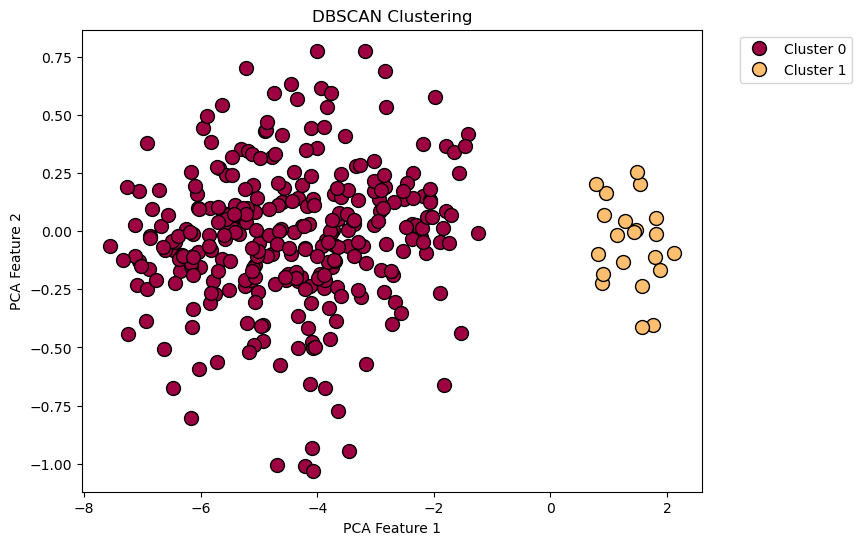

In [36]:
plt.figure(figsize=(8, 6))

unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]

for k, col in zip(unique_labels, colors):
    if k == -1:
#         Black used for noise points
#         col = [0, 0, 0, 1]
        continue

    class_member_mask = (labels == k)
    
    xy = pca_to_visualise_df[class_member_mask]
    plt.plot(
        xy['PCA_1'], 
        xy['PCA_2'], 
        'o', 
        markerfacecolor=tuple(col),
        markeredgecolor='k', 
        markersize=10,
        label=f'Cluster {k}'
    )

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Agglomerative Clustering

In [37]:
params = {}
print("=== df_to_cluster ===")
scores = silhouette_analysis(df_to_cluster, 15, AgglomerativeClustering, params)
print("=== pca_df === ")
scores = silhouette_analysis(pca_df, 15, AgglomerativeClustering, params)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
top_5_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:5]]

=== df_to_cluster ===
For n_clusters = 2, The average silhouette_score is : 0.37703064627973076
For n_clusters = 3, The average silhouette_score is : 0.22105608080516248
For n_clusters = 4, The average silhouette_score is : 0.1531086831821741
For n_clusters = 5, The average silhouette_score is : 0.1387768734107312
For n_clusters = 6, The average silhouette_score is : 0.08471019595246303
For n_clusters = 7, The average silhouette_score is : 0.06837082561873634
For n_clusters = 8, The average silhouette_score is : 0.06355796195673333
For n_clusters = 9, The average silhouette_score is : 0.05058707443192498
For n_clusters = 10, The average silhouette_score is : 0.04735701456481337
For n_clusters = 11, The average silhouette_score is : 0.033964097581705883
For n_clusters = 12, The average silhouette_score is : 0.03382977251897592
For n_clusters = 13, The average silhouette_score is : 0.03404871971255978
For n_clusters = 14, The average silhouette_score is : 0.02906350862927169
For n_cluste

In [38]:
param_grid = {
    'n_clusters': top_5_n_clusters,
    'linkage': ['ward', 'complete', 'average', 'single']
}

In [39]:
agglo = AgglomerativeClustering()

grid_search = GridSearchCV(
    estimator=agglo, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
)
grid_search.fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'linkage': 'average', 'n_clusters': 2}
Best score: 0.4780766283923919


In [40]:
agglo = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage']
).fit(pca_df)
agglo.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Fuzzy c-means

In [41]:
params = {
    'random_state': 23,
}

print("=== df_to_cluster ===")
scores = silhouette_analysis(df_to_cluster.values, 15, FCM, params)
print("=== pca_df === ")
scores = silhouette_analysis(pca_df.values, 15, FCM, params)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
top_5_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:5]]

=== df_to_cluster ===
For n_clusters = 2, The average silhouette_score is : 0.36547809702448186
For n_clusters = 3, The average silhouette_score is : 0.22548356646368264
For n_clusters = 4, The average silhouette_score is : 0.1595386945277127
For n_clusters = 5, The average silhouette_score is : 0.12034723737630794
For n_clusters = 6, The average silhouette_score is : 0.09140293241203651
For n_clusters = 7, The average silhouette_score is : 0.07684298426489417
For n_clusters = 8, The average silhouette_score is : 0.06644099896943664
For n_clusters = 9, The average silhouette_score is : 0.05777219000240449
For n_clusters = 10, The average silhouette_score is : 0.04896898523430709
For n_clusters = 11, The average silhouette_score is : 0.04753024213312905
For n_clusters = 12, The average silhouette_score is : 0.041719665169720734
For n_clusters = 13, The average silhouette_score is : 0.03403744256924164
For n_clusters = 14, The average silhouette_score is : 0.03728830527680673
For n_clust

In [42]:
param_grid = {
    'n_clusters': top_5_n_clusters,
    'max_iter': [50, 100, 150, 2500] ,
    'm': [1, 2, 3],
    'error': [1e-3, 1e-4, 1e-5, 1e-6]
}

In [43]:
models = []
for n_clusters in param_grid['n_clusters']:
    fcm = FCM(random_state=23, n_clusters=n_clusters)
    fcm.fit(pca_df.values)
    models.append(fcm)

In [44]:
pca_to_visualise_df = execute_pca(pca_df, 2)

Sum of Explained Variance: 0.8896767665516336


In [45]:
pca_to_visualise_df.values.shape

(1886, 2)

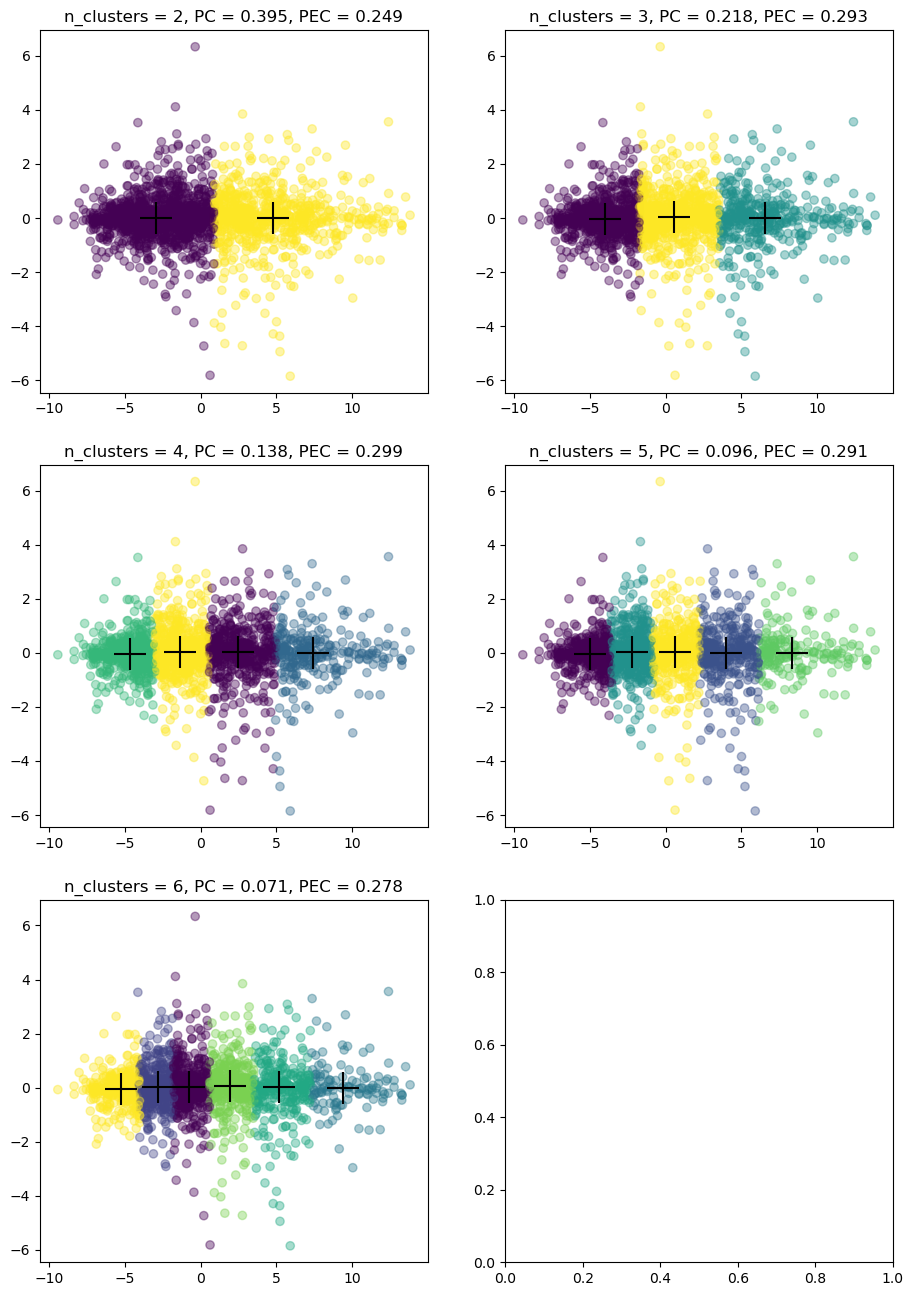

In [46]:
num_clusters = len(param_grid['n_clusters'])
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))

fig, ax = plt.subplots(rows, cols, figsize=(11, 16))

for n_clusters, model, axe in zip(param_grid['n_clusters'], models, ax.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(pca_df.values)
    
    # plot result
    axe.scatter(pca_to_visualise_df.values[:, 0], pca_to_visualise_df.values[:, 1], c=fcm_labels, alpha=0.4)
    axe.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
    
plt.show()